# Daily end-of-day N225 Dec Futures Prices from 1 Sep to 15 Oct, 1999

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats

In [2]:
#Theory
#if F_t,T > (S_t - D^*)(1 + r_t,T) #future don't have dividend only stocks have
#1.long position in the stocks
#2.sell an index futures

#At time T
#sell portfolio: S_T - (S_t - D^*)(1 + r_t,T)
#close the position: F_t,T - S_T(or F_T,T)
#F_t,T - (S_t - D^*)(1 + r_t,T) #this is the future value

#if there is a transition cost: T_fee
#At time T
#sell portfolio: (1 - T_fee)*S_T - ((1 + T_fee)*S_t - D^*)(1 + r_t,T)
#close the position: F_t,T - S_T(or F_T,T)
#F_t,T - (S_t - D^*)(1 + r_t,T) #this is the future value

In [3]:
df = pd.read_csv("N225.csv")
df.head(),len(df)

(   N225index  ContrYr      Date    Time  FutPrice  Days_to_mat
 0   17479.57     1999  19990901  141737     17740           98
 1   17630.32     1999  19990902  142445     17645           97
 2   17559.40     1999  19990903  142444     17515           96
 3   17664.06     1999  19990906  142457     17790           93
 4   17651.94     1999  19990907  142456     17690           92,
 30)

In [4]:
futpr = df["FutPrice"]
spotpr = df["N225index"]
ttm = df["Days_to_mat"]/365

In [5]:
### Assume transactions cost 0.5% (brokerage and exchange fees)
T_fee = 0.005
### Assume N225 portfolio aggregate dividend was 1.0% p.a.
D_rate = 0.01
### Assume Japanese riskfree rate was 0.5% p.a.
R_f = 0.005
fairpr = [0]*30

In [6]:
for i in range(30):
    #Dividend Present Value
    spot_D = D_rate*spotpr[i]*ttm[i]/(1+R_f*ttm[i])
    if futpr[i] > spotpr[i]:
        fairpr[i] = 1.01*(spotpr[i] - spot_D)*(1+R_f*ttm[i])
    else:
        fairpr[i] = 0.99*(spotpr[i] - spot_D)*(1+R_f*ttm[i])

In [7]:
#futute value of divident
spotpr*D_rate*ttm

0     46.931448
1     46.853179
2     46.183627
3     45.007057
4     44.492561
5     43.654395
6     43.587814
7     42.888368
8     41.787989
9     41.010311
10    39.257066
11    38.926568
12    38.176942
13    38.003848
14    36.860706
15    35.128961
16    34.102707
17    33.784920
18    33.674341
19    33.666099
20    33.581378
21    32.445035
22    32.142814
23    31.581630
24    31.537026
25    30.922040
26    29.232463
27    28.212614
28    27.644594
29    26.866361
dtype: float64

In [8]:
time = np.array(range(len(df["Time"])))
print(time)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


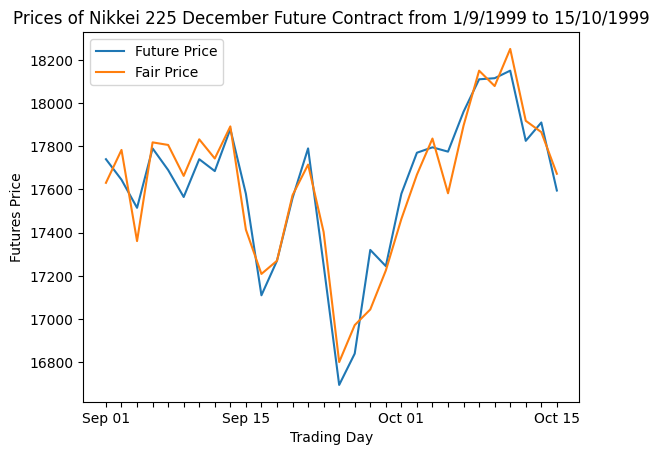

In [9]:
plt.plot(time, futpr)
plt.plot(time, fairpr)
(plt.xticks(np.arange(30), 
            ['Sep 01','','','','','','','','','Sep 15','','','','','','','','','','Oct 01','','','','','','','','','','Oct 15']
           )
)

plt.xlabel("Trading Day")
plt.ylabel("Futures Price")
plt.title("Prices of Nikkei 225 December Future Contract from 1/9/1999 to 15/10/1999")
plt.legend(["Future Price", 'Fair Price'])
plt.show()

In [10]:
p = (futpr - fairpr)/fairpr

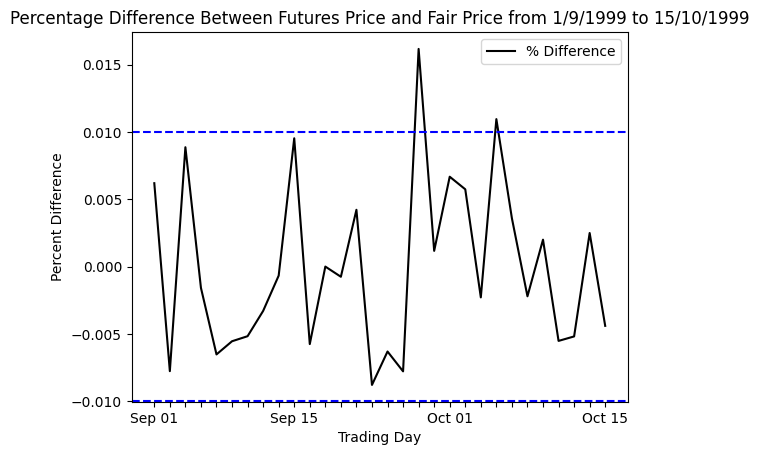

In [11]:
plt.plot(time, p, color = 'black')
plt.xticks(np.arange(30), 
           ['Sep 01','','','','','','','','','Sep 15','','','','','','','','','','Oct 01','','','','','','','','','','Oct 15'])

plt.xlabel("Trading Day")
plt.ylabel("Percent Difference")
plt.axhline(y = 0.01, color = 'b', linestyle = '--')
plt.axhline(y = -0.01, color = 'b', linestyle = '--')
plt.title("Percentage Difference Between Futures Price and Fair Price from 1/9/1999 to 15/10/1999")
plt.legend(["% Difference"])
plt.show()

# Regression of Change ln(F_t/F*_t ) on Its Lag

In [12]:
Y = np.log(futpr/fairpr)
len(Y)

30

In [13]:
dY = (Y - Y.shift(1)).dropna()
dY0 = dY[1:]
dY1 = dY.shift(1).dropna()
len(dY0),len(dY1)

(28, 28)

In [17]:
y = dY0
x = dY1

x = x.tolist()
y = y.tolist()

x = sm.add_constant(x)

result = sm.OLS(y,x).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     13.99
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           0.000916
Time:                        17:25:29   Log-Likelihood:                 97.874
No. Observations:                  28   AIC:                            -191.7
Df Residuals:                      26   BIC:                            -189.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.543e-05      0.001      0.032      0.9

In [19]:
print('Parameters:', result.params[0], result.params[1])
print('R2:', result.rsquared)
print('Adj_R2:', result.rsquared_adj)
print('ssr:', result.ssr) #not sure this
print('S.E. of reg:', np.sqrt(result.mse_resid)) #not sure this
print('F_value:', result.fvalue)
print('Prob(F):', result.f_pvalue)

Parameters: 4.542913796079138e-05 -0.5735640477623956
R2: 0.3498828558055682
Adj_R2: 0.3248783502596285
ssr: 0.001508444461333669
S.E. of reg: 0.0076168953430304906
F_value: 13.992792425458832
Prob(F): 0.0009159594936157826


# Plot of Residuals

In [23]:
mu, std = stats.norm.fit(result.resid)
mu, std

(2.4781763942525814e-19, 0.007339824008530618)

In [24]:
re = result.resid
print(re)

[ 8.56440680e-03 -9.16762822e-04 -1.09780529e-02 -1.90876558e-03
  8.95476478e-04  2.05529951e-03  3.66304518e-03  1.16170391e-02
 -9.47620054e-03 -3.02312081e-03  2.50823636e-03  4.48502184e-03
 -1.02336129e-02 -5.02206162e-03 -9.60098315e-05  2.29508062e-02
 -1.23550215e-03 -3.08887811e-03  2.17134952e-03 -8.59182397e-03
  8.54130184e-03  2.01403954e-04 -1.00280942e-02  8.42233813e-04
 -5.16494921e-03 -4.03190714e-03  7.83689165e-03 -2.53677054e-03]


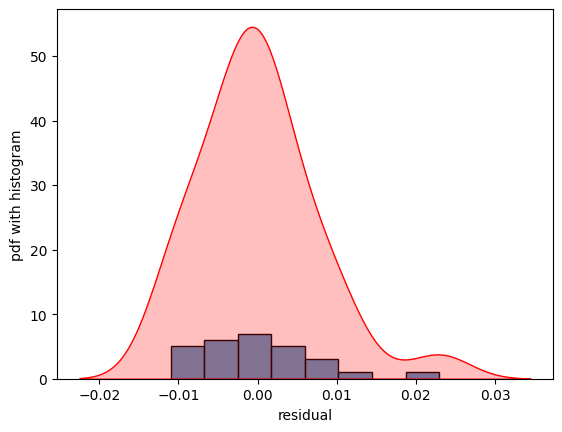

In [28]:
sns.histplot(result.resid)
sns.kdeplot(result.resid, color = 'r', fill = True)

plt.xlabel('residual')
plt.ylabel('pdf with histogram')
plt.show()

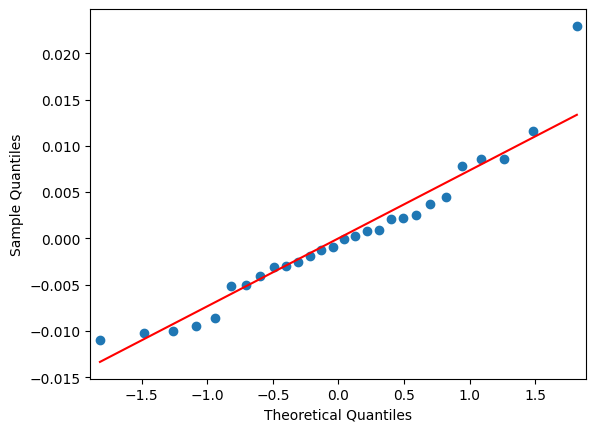

In [31]:
sm.qqplot(result.resid, line = 's');

# Hedging

In [32]:
### Form a hedge portfolio comprising V_t = f*S_t (V_t is value of diversified portfolio of Jap stocks, S_t = N255 Index)
### and h number of short N225 index future contracts. Notional value of future contracts = 500*F
### change in hedged portfolio value P_t+1 - P_t = f*(S_t+1 - S_t) - h*500*(F_t+1 - F_t). Minimize var(P_t+1 - P_t)
### optimal h* = (f/500)*(cov(S_t+1 - S_t, F_t+1,T - F_t,T)/var(F_t+1,T - F_t,T))
### current N225 index on 1 Sep is 17479.57; suppose portfolio value is 10 billion to be hedged, f = 10B/17479.57
f = round(1e10/17479)

In [33]:
f

572115

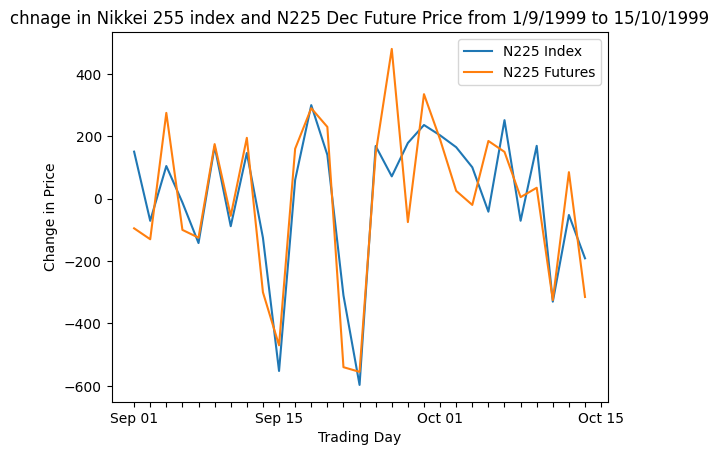

In [34]:
CS = (spotpr - spotpr.shift(1)).dropna()
CF = (futpr - futpr.shift(1)).dropna()
time1 = np.array(range(len(CS)))

plt.plot(time1, CS)
plt.plot(time1, CF)
plt.xticks(np.arange(30), 
           ['Sep 01','','','','','','','','','Sep 15','','','','','','','','','','Oct 01','','','','','','','','','','Oct 15'])

plt.xlabel('Trading Day')
plt.ylabel('Change in Price')
plt.title('chnage in Nikkei 255 index and N225 Dec Future Price from 1/9/1999 to 15/10/1999')
plt.legend(['N225 Index', 'N225 Futures'])
plt.show()

In [35]:
CF = sm.add_constant(CF)
result2 = sm.OLS(CS, CF).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:              N225index   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     59.66
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           2.63e-08
Time:                        20:18:14   Log-Likelihood:                -181.12
No. Observations:                  29   AIC:                             366.2
Df Residuals:                      27   BIC:                             369.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6663     24.020      0.194      0.8

In [36]:
beta = result2.params[1]
optimal_h = beta*f/500
print(optimal_h)

818.9830777950905


/var/folders/3n/nw89x0ps641_b68818_57b2h0000gn/T/ipykernel_14621/1883385955.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = result2.params[1]


In [40]:
### Above assumes we know the data forward at 1 Sep. That is just for demonstration. In principle, we should obtain more past
###  data just prior to 1 Sep to estimate the beta.